<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP2/ML2025_MiniP2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing Dataset

In [1]:
!gdown 1Y4yIQPtiZtypQg1NlVAdhulWJTSzTpxW
dataset = '/content/spam.csv'

Downloading...
From: https://drive.google.com/uc?id=1Y4yIQPtiZtypQg1NlVAdhulWJTSzTpxW
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 83.9MB/s]


## Import neccessery libraries






In [2]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv(dataset,encoding='ISO-8859-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


### Preproccessing Dataset

In [4]:


df = df[['v1','v2']].copy()

df.columns = ['label','text']

df['label'] = df['label'].map({'ham':0,'spam':1})

def clean_text(text:str):
    text = text.lower()                           # Lowercase all text
    text = re.sub(r'\W+', ' ', text)              # Remove punctuation
    text = re.sub(r'\d+', '', text)               # Remove digits
    text = re.sub(r'\s+', ' ', text).strip()      # Remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)

df['tokens'] = df['clean_text'].apply(lambda x:x.split())



In [ ]:
display(df.head(5))

,label,text,clean_text,tokens
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [5]:


# Step 1: Build the vocabulary from all tokens
vocab = set()
for tokens in df['tokens']:
    vocab.update(tokens)
vocab = sorted(vocab)  # Keep it ordered for consistent indexing


# Create a mapping from word → index
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Step 2: Convert each message into a count vector
def vectorize(tokens):
    vec = [0] * len(vocab)
    word_counts = Counter(tokens)
    print(word_counts)
    for word, count in word_counts.items():
        if word in word_to_index:
            vec[word_to_index[word]] = count
    return vec

# Apply to all messages
df['bow_vector'] = df['tokens'].apply(vectorize)

# Show first few vectorized samples (optional)
for i in range(3):
    print(f"Message {i} vector:\n{df['bow_vector'].iloc[i]}")


Streaming output truncated to the last 5000 lines.
Counter({'our': 1, 'mobile': 1, 'number': 1, 'has': 1, 'won': 1, 'å': 1, 'to': 1, 'claim': 1, 'calls': 1, 'us': 1, 'back': 1, 'or': 1, 'ring': 1, 'the': 1, 'claims': 1, 'hot': 1, 'line': 1, 'on': 1})
Counter({'marriage': 2, 'is': 2, 'u': 2, 'snake': 2, 'bite': 2, 'me': 2, 'arngd': 1, 'while': 1, 'r': 1, 'walkin': 1, 'unfortuntly': 1, 'a': 1, 'bites': 1, 'bt': 1, 'love': 1, 'dancing': 1, 'in': 1, 'frnt': 1, 'of': 1, 'd': 1, 'amp': 1, 'sayin': 1})
Counter({'huh': 1, 'so': 1, 'early': 1, 'then': 1, 'ì_': 1, 'having': 1, 'dinner': 1, 'outside': 1, 'izzit': 1})
Counter({'ok': 1, 'anyway': 1, 'no': 1, 'need': 1, 'to': 1, 'change': 1, 'with': 1, 'what': 1, 'you': 1, 'said': 1})
Counter({'to': 2, 'reply': 2, 'we': 1, 'tried': 1, 'contact': 1, 'you': 1, 're': 1, 'your': 1, 'our': 1, 'offer': 1, 'of': 1, 'mins': 1, 'textand': 1, 'a': 1, 'new': 1, 'video': 1, 'phone': 1, 'call': 1, 'now': 1, 'or': 1, 'for': 1, 'free': 1, 'delivery': 1, 'tomorrow'

In [6]:

X = np.array(df['bow_vector'].tolist())
y = np.array(df['label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:


class MultinomialNaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.word_likelihoods = {}
        self.vocab_size = 0
        self.class_word_totals = {}

    def fit(self, X, y):
        self.vocab_size = X.shape[1]
        n_samples = X.shape[0]
        classes = np.unique(y)

        self.class_priors = {}
        self.word_likelihoods = {c: np.ones(self.vocab_size) for c in classes}
        self.class_word_totals = {c: self.vocab_size for c in classes}

        for c in classes:
            X_c = X[y == c]
            self.class_priors[c] = X_c.shape[0] / n_samples
            word_counts = X_c.sum(axis=0)
            self.word_likelihoods[c] += word_counts
            self.class_word_totals[c] += word_counts.sum()

        for c in classes:
            self.word_likelihoods[c] /= self.class_word_totals[c]

    def predict(self, X):
        predictions = []
        for x in X:
            x = np.array(x)
            class_scores = {}
            for c in self.class_priors:
                log_likelihood = np.sum(x * np.log(self.word_likelihoods[c] + 1e-10))
                log_prior = np.log(self.class_priors[c] + 1e-10)
                class_scores[c] = log_prior + log_likelihood
            predictions.append(max(class_scores, key=class_scores.get))
        return np.array(predictions)

    def accuracy(self, X, y_true):
        """
        Computes accuracy on given test set.
        """
        y_pred = self.predict(X)
        correct = (y_pred == y_true).sum()
        return correct / len(y_true)



accuracy_score:0.9748878923766816classification Report :              precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.90      0.91      0.91       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.95      1115
weighted avg       0.98      0.97      0.97      1115



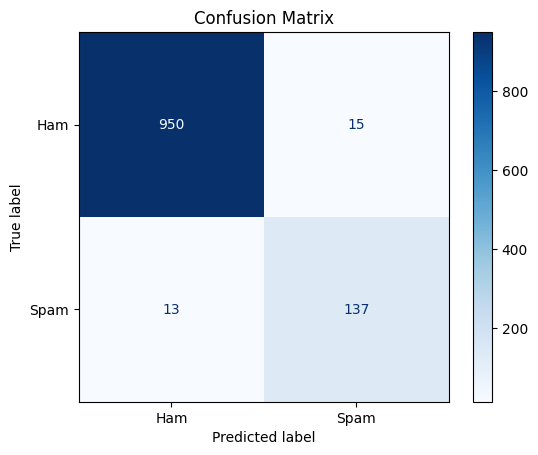

In [8]:


self_clf = MultinomialNaiveBayes()
self_clf.fit(X_train, y_train)
y_pred = self_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy_score:{accuracy}classification Report :{classification_report(y_test,y_pred)}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()




Using Sklearn to implement MultinominalNaiveBayes

accuracy_score:0.9748878923766816classification Report :              precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.90      0.91      0.91       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.95      1115
weighted avg       0.98      0.97      0.97      1115



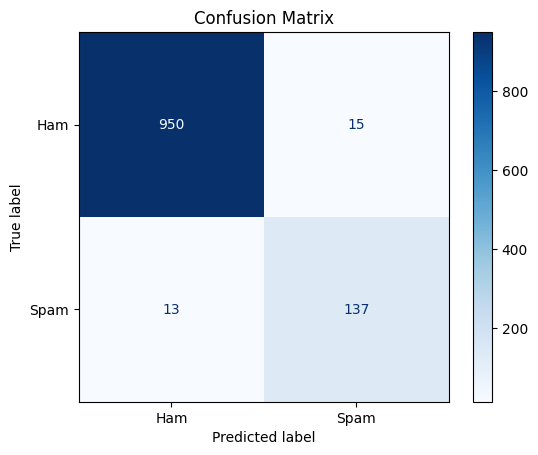

In [9]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy_score:{accuracy}classification Report :{classification_report(y_test,y_pred)}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [10]:
class MultinomialNaiveBayesSensetivePam:
    def __init__(self):
        self.class_priors = {}
        self.word_likelihoods = {}
        self.vocab_size = 0
        self.class_word_totals = {}

    def fit(self, X, y):
        self.vocab_size = X.shape[1]
        n_samples = X.shape[0]
        classes = np.unique(y)

        self.class_priors = {}
        self.word_likelihoods = {c: np.ones(self.vocab_size) for c in classes}
        self.class_word_totals = {c: self.vocab_size for c in classes}

        for c in classes:
            X_c = X[y == c]
            self.class_priors[c] = X_c.shape[0] / n_samples
            word_counts = X_c.sum(axis=0)
            self.word_likelihoods[c] += word_counts
            self.class_word_totals[c] += word_counts.sum()

        for c in classes:
            self.word_likelihoods[c] /= self.class_word_totals[c]

    def predict(self, X):
        predictions = []
        for x in X:
            x = np.array(x)
            class_scores = {}
            for c in self.class_priors:
                log_likelihood = np.sum(x * np.log(self.word_likelihoods[c]))
                log_prior = np.log(self.class_priors[c])
                if c == 1:  # Adjust for spam
                    log_likelihood += 5
                      # Increase likelihood for spam
                class_scores[c] = log_prior + log_likelihood
            predictions.append(max(class_scores, key=class_scores.get))
        return np.array(predictions)

    def accuracy(self, X, y_true):
        """
        Computes accuracy on given test set.
        """
        y_pred = self.predict(X)
        correct = (y_pred == y_true).sum()
        return correct / len(y_true)



accuracy_score:0.8995515695067264classification Report :              precision    recall  f1-score   support

           0       0.99      0.89      0.94       965
           1       0.58      0.95      0.72       150

    accuracy                           0.90      1115
   macro avg       0.78      0.92      0.83      1115
weighted avg       0.94      0.90      0.91      1115



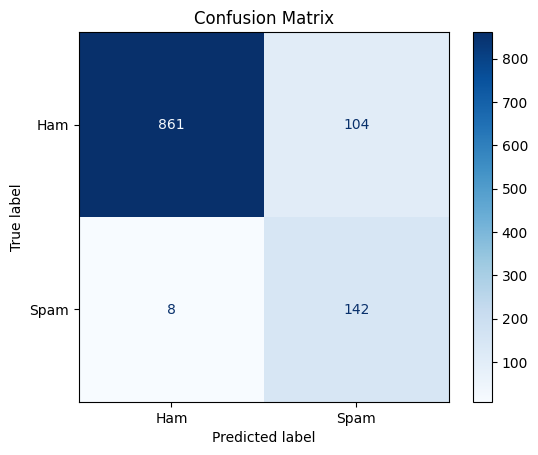

In [11]:
clf_3 =   MultinomialNaiveBayesSensetivePam()
clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy_score:{accuracy}classification Report :{classification_report(y_test,y_pred)}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()